# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Automatic Feature Engineering, Pt. 1
Week 5 | Lesson 2.4

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- 

In [1]:
from os import chdir; chdir('../lib')
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from madelon import standard_classification, load_madelon_set_into_df

## Domain & Data

### Domain

Prepared for the Neural Information Processing Symposium 2003 Feature Extraction Workshop

http://clopinet.com/isabelle/Projects/NIPS2003

### Data 

MADELON is an artificial dataset, which was part of the NIPS 2003 feature selection challenge. This is a two-class classification problem with continuous input variables. The difficulty is that the problem is multivariate and highly non-linear.

MADELON is an artificial dataset containing data points grouped in 32 clusters placed on the vertices of a five dimensional hypercube and randomly labeled +1 or -1. The five dimensions constitute 5 informative features. 15 linear combinations of those features were added to form a set of 20 (redundant) informative features. Based on those 20 features one must separate the examples into the 2 classes (corresponding to the +-1 labels). We added a number of distractor feature called 'probes' having no predictive power. The order of the features and patterns were randomized. 

In [2]:
madelon_feature_df, madelon_target_df = load_madelon_set_into_df()
madelon_feature_df.head(3)

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_490,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496
1,483,458,460,487,587,475,526,479,485,469,...,463,478,487,338,513,486,483,492,510,517
2,487,542,499,468,448,471,442,478,480,477,...,487,481,492,650,506,501,480,489,499,498


In [3]:
madelon_feature_df.shape

(2000, 500)

## Problem Statement

The NIPS 2003 challenge in feature selection is to find feature selection algorithms that significantly outperform methods using all features in performing a binary classification task.

## Solution Statement

We will develop a binary classification model and attempt to augment its performance using automatic feature selection techniques.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

trained_knn = standard_classification(KNeighborsClassifier,
                                      madelon_feature_df,
                                      madelon_target_df,
                                      {'n_neighbors' : 17,
                                       'n_jobs':-1},
                                      random_state_split=42)

trained_logreg = standard_classification(LogisticRegression,
                                         madelon_feature_df,
                                         madelon_target_df,
                                         {'random_state' : 17,
                                          'n_jobs':-1},
                                         random_state_split=42)

KNeighborsClassifier n_neighbors:17 n_jobs:-1
LogisticRegression random_state:17 n_jobs:-1


## Metric 

Today, we will examine all of the metrics that we have used so far - Accuracy, Precision, Recall, and F1-Score, as well as look at a Confusion Matrix. For comparing models, we will use Accuracy.

## Benchmark

We will use as a benchmark our mean accuracy across five random train test splits using a K Nearest Neighbors model with an optimal value for number of `n_neighbors`. This model had a 73.8% accuracy.

<img src="assets/benchmark.png" width="300px">

## Automating Feature Engineering

In [5]:
from sklearn.pipeline import Pipeline

[`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) can be used to chain multiple estimatros into one.

We will use it as our primary tool for creating automated feature engineering flows. 

#### Advantages

1. It is a **convenience method** allowing us to call `fit`, `predict`, and `score` only once in order to build and validate a model.
1. It allows for joint parameter selection, allowing use to **grid search over all parameters** in the pipeline at once.

### A Simple Example

In [6]:
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline

#### 2. Split the data into training and testing sets

In [7]:
from sklearn.model_selection import train_test_split

X_train, \
X_test,  \
y_train, \
    y_test = train_test_split(madelon_feature_df, 
                              madelon_target_df,
                              random_state=42)

#### 3. Create a new model

In [8]:
this_pipeline = (SelectKBest(f_classif, k=5),
                 KNeighborsClassifier(n_neighbors=17))

anova_classifier = make_pipeline(*this_pipeline)

#### 4. Fit the model

In [13]:
Pipeline.__class__.__name__

'ABCMeta'

In [9]:
anova_classifier.fit(X_train, y_train)

Pipeline(steps=[('selectkbest', SelectKBest(k=5, score_func=<function f_classif at 0x7fae3aa977d0>)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform'))])

#### 5. Score the model

In [10]:
anova_classifier.score(X_train, y_train), \
    anova_classifier.score(X_test, y_test)

(0.70666666666666667, 0.60999999999999999)

### Independent Practice

Complete this wrapper function

In [14]:
def general_classifier(X, y, model, random_state):
    
    X_train, \
    X_test,  \
    y_train, \
        y_test = train_test_split(X, y, random_state=random_state)
    
    model.fit(X_train, y_train)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    return {'model' : model,
            'train_score' : train_score,
            'test_score' : test_score}

### Test your Function

You should have the same scores as above.

In [15]:
this_pipeline = (
    SelectKBest(f_classif, k=5),
    KNeighborsClassifier(n_neighbors=17)
)
general_classifier(madelon_feature_df,
                   madelon_target_df,
                   make_pipeline(*this_pipeline), 42)

{'model': Pipeline(steps=[('selectkbest', SelectKBest(k=5, score_func=<function f_classif at 0x7fae3aa977d0>)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=17, p=2,
            weights='uniform'))]),
 'test_score': 0.60999999999999999,
 'train_score': 0.70666666666666667}

### How did this do versus our benchmark?

---

## `Pipeline` and `make_pipeline`

The `make_pipeline` method is a helper function that helps with constructing a `Pipeline` object.

In [19]:
type(KNeighborsClassifier)

abc.ABCMeta

In [26]:
estimators = [('selectkbest', SelectKBest(f_classif, k=5)),
              ('classifier', KNeighborsClassifier(n_neighbors=17))]

In [27]:
pipe = Pipeline(estimators)
via_make = make_pipeline(*this_pipeline)
pipe

Pipeline(steps=[('selectkbest', SelectKBest(k=5, score_func=<function f_classif at 0x7fae3aa977d0>)), ('classifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform'))])

In [29]:
via_make

Pipeline(steps=[('selectkbest', SelectKBest(k=5, score_func=<function f_classif at 0x7fae3aa977d0>)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform'))])

We can not compare them via equality because they are objects and not **the same** object, but looking at their attributes, you can see that they are equivalent. 

### Accessing Steps in a Pipeline

In [30]:
print('As a List')
[print(step) for step in pipe.steps]

print('\nIndexed as a List')
print(pipe.steps[0])

print('\nAs a Dictionary')
print(pipe.named_steps['selectkbest'])

As a List
('selectkbest', SelectKBest(k=5, score_func=<function f_classif at 0x7fae3aa977d0>))
('classifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform'))

Indexed as a List
('selectkbest', SelectKBest(k=5, score_func=<function f_classif at 0x7fae3aa977d0>))

As a Dictionary
SelectKBest(k=5, score_func=<function f_classif at 0x7fae3aa977d0>)


### Adjusting Params after Instantiation

This uses a common syntax that you will see in a lot of query languages.

The syntax is 

    named_estimator__parameter
    
Python loves those dunders!

In [31]:
pipe.set_params(classifier__n_jobs=-1)
pipe

Pipeline(steps=[('selectkbest', SelectKBest(k=5, score_func=<function f_classif at 0x7fae3aa977d0>)), ('classifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
           weights='uniform'))])

### Pipeline and GridSearch

Quick review of [`GridSearchCV`](http://scikit-learn.org/stable/modules/grid_search.html#grid-search).

**Hyper-parameters** are parameters that are not directly learnt within estimators.

In scikit-learn they are passed as arguments to the constructor of the estimator classes.

The grid search provided by `GridSearchCV` exhaustively generates candidates from a grid of parameter values specified with the param_grid parameter. 

In [32]:
from sklearn.model_selection import GridSearchCV
params = dict(selectkbest__k=range(5,15),
              classifier__p=[1,2])

params

{'classifier__p': [1, 2],
 'selectkbest__k': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}

This specificies that the following grid should be explored:

- across `p` values for `KNearestNeighborsClassifer` (which specifies the way distance is calculated)
- across `k`values for `SelectKBest` (which specifies the number of features to use)

Let's search over our `madelon` dataset.

In [33]:
pipe_grid_search = GridSearchCV(pipe, param_grid=params)

In [34]:
grid_search_results = general_classifier(madelon_feature_df,
                                         madelon_target_df,
                                         pipe_grid_search,
                                         42)

In [35]:
grid_search_results['train_score'], grid_search_results['test_score']

(0.87666666666666671, 0.85599999999999998)

## How did it do against our benchmark?

In [37]:
grid_search_results['model']

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=5, score_func=<function f_classif at 0x7fae3aa977d0>)), ('classifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'selectkbest__k': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'classifier__p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [39]:
results_df = pd.DataFrame(grid_search_results['model'].cv_results_)
results_df.head(3)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_classifier__p,param_selectkbest__k,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.358089,0.140628,0.662667,0.710996,1,5,"{u'selectkbest__k': 5, u'classifier__p': 1}",18,0.658683,0.707708,0.638,0.706,0.691383,0.719281,0.390859,0.012697,0.021964,0.005899
1,0.122210,0.134402,0.654667,0.722994,1,6,"{u'selectkbest__k': 6, u'classifier__p': 1}",19,0.676647,0.715716,0.654,0.721,0.633267,0.732268,0.076777,0.002763,0.017716,0.006903
2,0.032921,0.133274,0.703333,0.766997,1,7,"{u'selectkbest__k': 7, u'classifier__p': 1}",15,0.700599,0.781782,0.674,0.728,0.735471,0.791209,0.015621,0.002531,0.025157,0.027842


(0.6, 1)

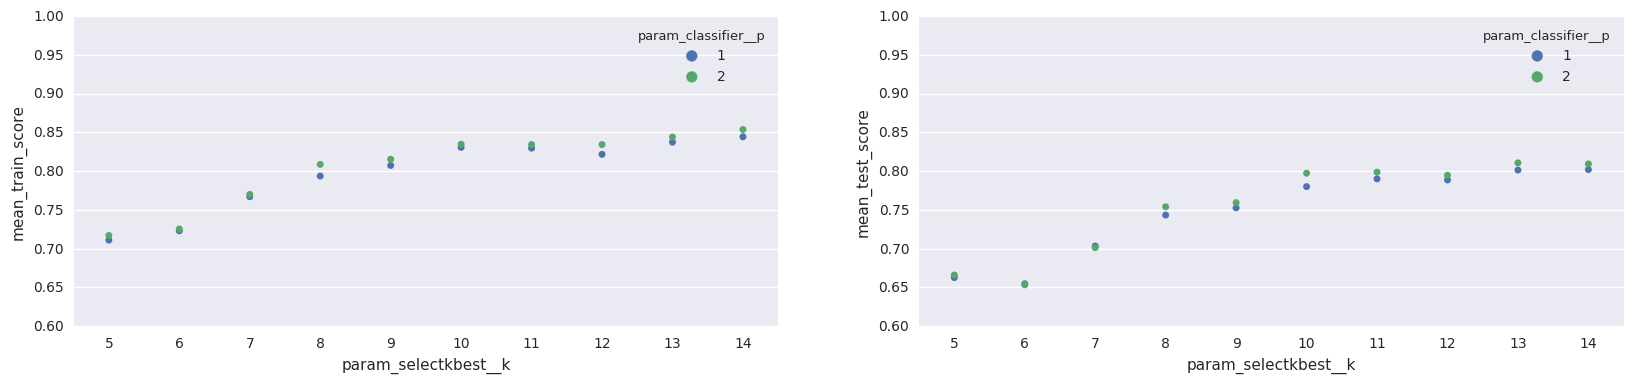

In [40]:
fig = plt.figure(figsize=(20,4))

fig.add_subplot(121)
sns.stripplot(y='mean_train_score',
              x='param_selectkbest__k',
              hue='param_classifier__p',
              data=results_df)
plt.ylim(0.6,1)

fig.add_subplot(122)
sns.stripplot(y='mean_test_score',
              x='param_selectkbest__k',
              hue='param_classifier__p',
              data=results_df)
plt.ylim(0.6,1)

# Automatic Feature Selection

## Why Feature Selection? 

Performing feature selection on our data can provide several major benefits to the development of our models. Feature selection can help with:

1. *Prediction Accuracy*, especially in terms of preventing overfitting. 

   - especially true when the number of instances is comparable or even smaller than the number of features

1. *Model Interpretability*, removing unneccessary features creates a model that is easier to understand, explain, and use

   - note that deep learning explicitly rejects this notion, actually creating hidden features that are not intended for human consumption
   
1. *Reduction in Complexity*, especially in terms of time and space complexity

   - a smaller model requires a smaller dataset (think columns not rows)
   - a smaller model requires less computation time
   

## Automatic Feature Selection in `sklearn`

When adding new features, or with high-dimensional datasets in general, it can be a good idea to reduce the number of features to only the most useful ones, and discard the rest.

This can lead to simpler models that generalize better.

But how can you know how good each feature is?

In `sklearn`, there are three basic strategies:

1. univariate statistics
   - ANOVA
1. model-based selection
1. iterative selection
   - forward-, backward-, and other kinds of selection

## Selection via Univariate Statistics aka ANOVA

In univariate statistics, we compute whether there is a statistically significant relationship between each feature and the target.

In the case of classification, this is also known as analysis of variance (ANOVA).

A key property of these tests is that they are univari‐ ate, meaning that they only consider each feature individually.

Consequently, a feature will be discarded if it is only informative when combined with another feature.

Univariate tests are often very fast to compute, and don’t require building a model. 

On the other hand, they are completely independent of the model that you might want to apply after the feature selection.

### In Practice

The methods differ in how they select relevant features, with the simplest ones being `SelectKBest`, which selects a fixed number `k` of features, and `SelectPercentile`, which selects a fixed percentage of features.

Here we will use `SelectPercentile` in a pipeline.

In [41]:
from sklearn.feature_selection import SelectPercentile

In [42]:
pipe = make_pipeline(SelectPercentile(percentile=50),
                     KNeighborsClassifier(n_neighbors=17))
        
classification_results = general_classifier(madelon_feature_df,
                                            madelon_target_df,
                                            pipe,
                                            42)    

In [43]:
classification_results['train_score'], classification_results['test_score']

(0.80200000000000005, 0.76200000000000001)

We saw this above using `SelectKBest`. Just as we did a grid search with `SelectKBest`, we could do a grid search with `SelectPercentile`.

In [44]:
params = dict(selectpercentile__percentile=[40,45,50,55,60,65])
pipe_grid_search = GridSearchCV(pipe, param_grid=params)
grid_search_results = general_classifier(madelon_feature_df,
                                         madelon_target_df,
                                         pipe_grid_search,
                                         42)

In [47]:
grid_search_results['test_score'], grid_search_results['train_score']

(0.76400000000000001, 0.81066666666666665)

In [49]:
cls = grid_search_results['model']

In [50]:
cls.best_params_

{'selectpercentile__percentile': 40}

(0.6, 1)

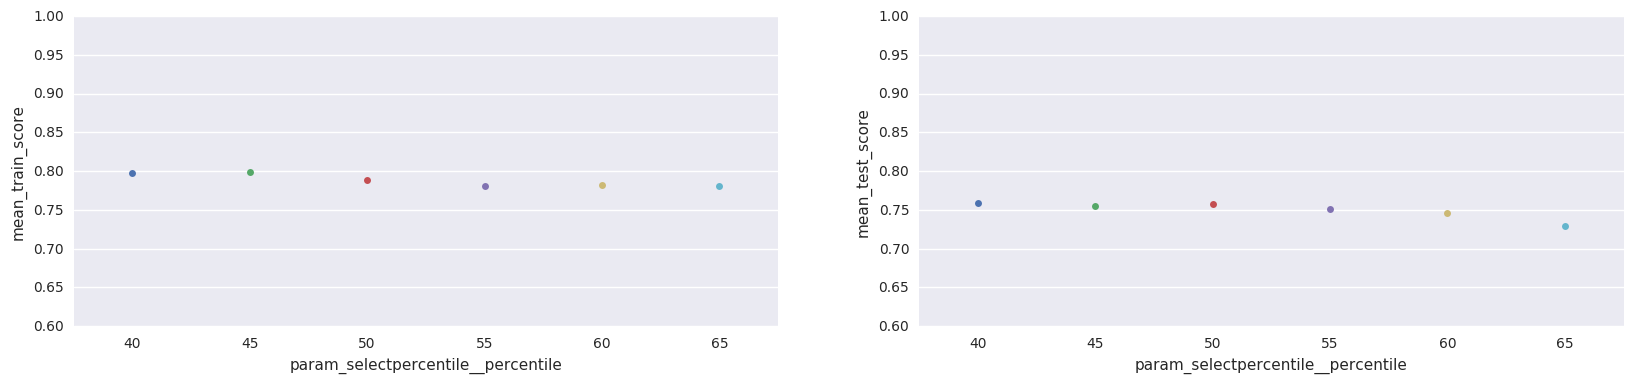

In [46]:
results_df = pd.DataFrame(grid_search_results['model'].cv_results_)
results_df.head(3)
fig = plt.figure(figsize=(20,4))

fig.add_subplot(121)
sns.stripplot(y='mean_train_score',
              x='param_selectpercentile__percentile',
              data=results_df)
plt.ylim(0.6,1)

fig.add_subplot(122)
sns.stripplot(y='mean_test_score',
              x='param_selectpercentile__percentile',
              data=results_df)
plt.ylim(0.6,1)

### Get the Support of our Selection

Suppose we were interested in which features were removed (in a context where the features have meaning!).

In [51]:
gs_cls = grid_search_results['model']
selector = gs_cls.estimator.steps[0]

In [52]:
selector

('selectpercentile', SelectPercentile(percentile=50,
          score_func=<function f_classif at 0x7fae3aa977d0>))

In [53]:
mask = selector[1].get_support()
mask

array([False,  True, False, False,  True,  True,  True, False, False,
        True,  True, False,  True, False, False,  True,  True, False,
        True,  True, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
       False,  True,  True, False, False, False,  True,  True,  True,
       False,  True, False,  True, False, False, False, False,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
        True,  True,  True, False, False,  True, False,  True, False,
       False,  True,  True,  True, False, False, False,  True, False,
        True,  True, False, False,  True, False,  True,  True, False,
       False,  True, False, False,  True, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True, False,  True, False, False,  True,  True,
        True,  True,

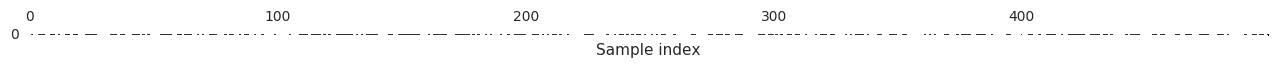

In [54]:
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

## Model-Based Feature Selection

Model-based feature selection uses a supervised machine learning model to judge the importance of each feature, and keeps only the most important ones.

The supervised model that is used for feature selection doesn’t need to be the same model that is used for the final supervised modeling.

The feature selection model needs to provide some measure of importance for each feature, so that they can be ranked by this measure.

Decision trees and decision tree–based models provide a `feature_importances_` attribute, which directly encodes the importance of each feature.

We will explore Decision Trees and their derivate models in depth later. For now, they are just another tool.

In [55]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf_cls = RandomForestClassifier(n_estimators=500, random_state=42) 
select = SelectFromModel(rf_cls, threshold="median")

In [57]:
pipe = make_pipeline(select,
                     KNeighborsClassifier(n_neighbors=17))
        
classification_results = general_classifier(madelon_feature_df,
                                            madelon_target_df,
                                            pipe,
                                            42)        

In [58]:
classification_results['train_score'], classification_results['test_score']

(0.80000000000000004, 0.73599999999999999)

In [59]:
params = dict(selectfrommodel__estimator=[
        RandomForestClassifier(n_estimators=100, random_state=42),
        RandomForestClassifier(n_estimators=200, random_state=42),
        RandomForestClassifier(n_estimators=300, random_state=42),
        RandomForestClassifier(n_estimators=400, random_state=42),
        RandomForestClassifier(n_estimators=500, random_state=42),
        RandomForestClassifier(n_estimators=600, random_state=42),
    ])
pipe_grid_search = GridSearchCV(pipe, param_grid=params)
grid_search_results = general_classifier(madelon_feature_df,
                                         madelon_target_df,
                                         pipe_grid_search,
                                         42)

In [62]:
grid_search_results['model'].best_params_

{'selectfrommodel__estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_jobs=1, oob_score=False, random_state=42,
             verbose=0, warm_start=False)}

In [63]:
grid_search_results['train_score'], grid_search_results['test_score']

(0.80000000000000004, 0.73599999999999999)

(0.6, 1)

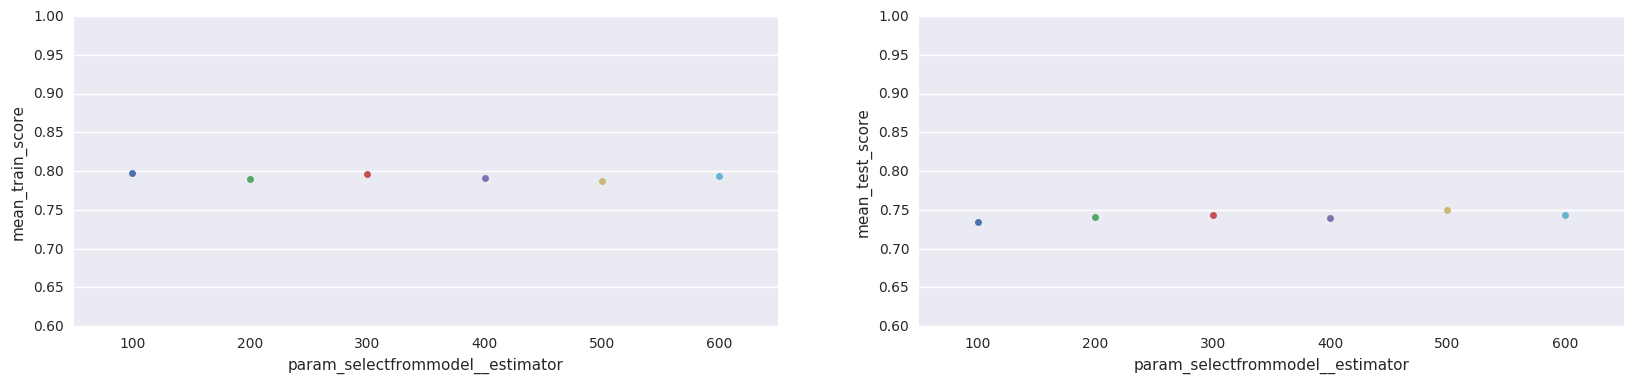

In [61]:
results_df = pd.DataFrame(grid_search_results['model'].cv_results_)
results_df.head(3)
fig = plt.figure(figsize=(20,4))

fig.add_subplot(121)
strp_plt = sns.stripplot(y='mean_train_score', 
                         x='param_selectfrommodel__estimator',
                         data=results_df)
strp_plt.set(xticklabels=[100,200,300,400,500,600])
plt.ylim(0.6,1)

fig.add_subplot(122)
strp_plt = sns.stripplot(y='mean_test_score', 
                         x='param_selectfrommodel__estimator',
                         data=results_df)
strp_plt.set(xticklabels=[100,200,300,400,500,600])
plt.ylim(0.6,1)

In [ ]:
gs_cls = grid_search_results['classifier']
selector = gs_cls.estimator.steps[0]
mask = selector[1].get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

## Iterative Feature Selection

In univariate testing we used no model.

In model-based selection we used a single model to select features.

In iterative feature selection, a series of models are built, with varying numbers of features.

There are two basic methods: starting with no features and adding features one by one until some stopping criterion is reached, or starting with all features and removing features one by one until some stopping criterion is reached.

We have a lot of features, so we will set a fairly large step for this process.


In [64]:
from sklearn.feature_selection import RFE

In [65]:
rf_cls = RandomForestClassifier(n_estimators=500, random_state=42)
select = RFE(rf_cls, n_features_to_select=40, step=20)

pipe = make_pipeline(select,
                     KNeighborsClassifier(n_neighbors=17))
        
classification_results = general_classifier(madelon_feature_df,
                                            madelon_target_df,
                                            pipe,
                                            42)        

In [66]:
classification_results['train_score'], classification_results['test_score']

(0.86799999999999999, 0.84199999999999997)

In [67]:
rf_cls = RandomForestClassifier(n_estimators=500, random_state=42)
select_1 = RFE(rf_cls, n_features_to_select=30, step=20)
select_2 = RFE(rf_cls, step=1)

pipe = make_pipeline(select_1, select_2, KNeighborsClassifier(n_neighbors=17))
pipe

Pipeline(steps=[('rfe-1', RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
  ...wski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform'))])

In [ ]:
params = {'rfe-2__n_features_to_select' : range(5,30)}

In [ ]:
pipe_grid_search = GridSearchCV(pipe, param_grid=params)
grid_search_results = general_classifier(madelon_feature_df,
                                         madelon_target_df,
                                         pipe_grid_search,
                                         42)

In [ ]:
results_df = pd.DataFrame(grid_search_results['classifier'].cv_results_)
results_df.head(3)
fig = plt.figure(figsize=(20,4))

fig.add_subplot(121)
strp_plt = sns.stripplot(y='mean_train_score', 
                         x='rfe-2__n_features_to_select',
                         data=results_df)
plt.ylim(0.6,1)

fig.add_subplot(122)
strp_plt = sns.stripplot(y='mean_test_score', 
                         x='rfe-2__n_features_to_select',
                         data=results_df)
plt.ylim(0.6,1)